# Supervised Learning Algorithms - KNN
Build a KNN model on iris dataset with a high accuracy score. Perform some appropriate Pre-Processing steps on the given dataset for better results. Implement the KNN algorithm on your own. Try other possible processes that can be done to dataset and tuning the model to increase accuracy such as Increase K value, Normalization and Different Distance Metrics. Perform Feature Ablation Study. Additional Tries: Weight the features before doing KNN prediction.



#### Importing the libraries

In [483]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

#### Loading diabetes dataset and splitting the data into training and testing sets

In [484]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Defining different distance metrics

In [485]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def manhattan_distance(x1, x2):
    return abs(x1 - x2)

#### Implementing KNN

In [486]:
class KNNClassifier:
    def __init__(self, k=2, p=1):
        self.k = k
        self.p = p
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        return self
    
    def predict(self, X):
        predictions = []
        self.confidence = []
        for pred_row in X:
            distances = []
            for X_row in self.X:
                distance = np.linalg.norm(X_row - pred_row, ord=self.p)
                distances.append(distance)
            neighbors = self.y[np.argsort(distances)[:self.k]]
            neighbors_bc = np.bincount(neighbors)
            prediction = np.argmax(neighbors_bc)
            self.confidence.append(neighbors_bc[prediction]/len(neighbors))
            predictions.append(prediction)
        predictions = np.array(predictions)
        return predictions

#### Initializing the KNN Model and fitting data

In [487]:
knn = KNNClassifier()  # k = 2 and using manhattan distance
knn.fit(X_train,y_train)

#### Predicting 

In [488]:
y_pred=knn.predict(X_test)

#### Confusion Matrix and Accuracy

Confusion Matrix:
[[12  0  0]
 [ 0 11  0]
 [ 0  1  6]]
Accuracy :  0.97


<Axes: >

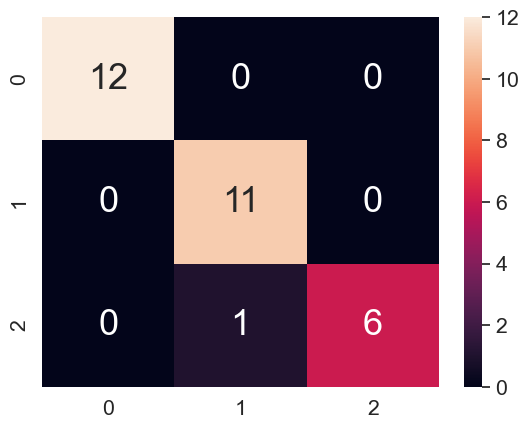

In [489]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"Accuracy : {accuracy_score(y_test, y_pred): 0.2f}")

df = pd.DataFrame(cm)
sb.set(font_scale = 1.4)
sb.heatmap(df, annot = True, annot_kws = {"size" : 26})

#### Using different values for k and different distance metrics

Confusion Matrix:
[[12  0  0]
 [ 0 11  0]
 [ 0  0  7]]
Accuracy :  1.00


<Axes: >

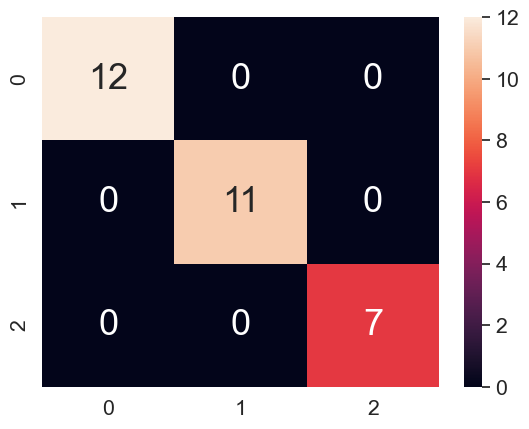

In [490]:
knn = KNNClassifier(k = 3, p = 2)  # k = 3 and using euclidean distance
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"Accuracy : {accuracy_score(y_test, y_pred): 0.2f}")
df = pd.DataFrame(cm)
sb.set(font_scale = 1.4)
sb.heatmap(df, annot = True, annot_kws = {"size" : 26})

Confusion Matrix:
[[12  0  0]
 [ 0 11  0]
 [ 0  1  6]]
Accuracy :  0.97


<Axes: >

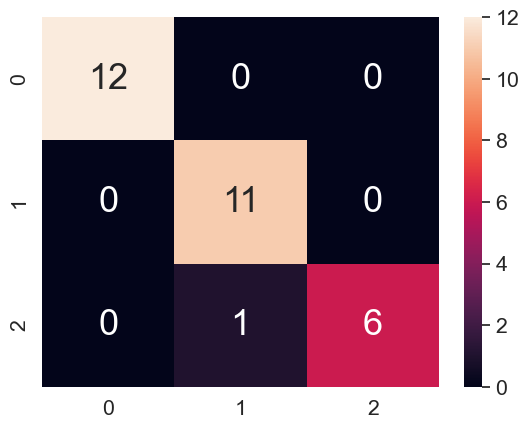

In [491]:
knn = KNNClassifier(k = 50, p = 2)  # k = 50 and using euclidean distance
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"Accuracy : {accuracy_score(y_test, y_pred): 0.2f}")
df = pd.DataFrame(cm)
sb.set(font_scale = 1.4)
sb.heatmap(df, annot = True, annot_kws = {"size" : 26})

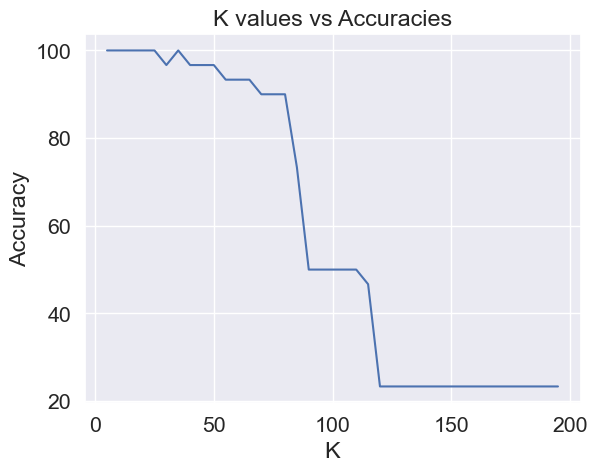

In [492]:
k_values = []
accuracies = []
for i in range(5,200,5):  #steps in values of k with 5
    knn = KNNClassifier(k = i, p = 2)  
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred) * 100
    k_values.append(i)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies)
plt.title("K values vs Accuracies")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()    

#### It can be seen that increasing the value of k significantly results in the problem of overfilling causing the overall accuracy to drop.